## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice = len(df['Mouse ID'].unique())
print(f'The number of mice is {num_mice}.')

The number of mice is 249.


In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']) == True, 'Mouse ID'].unique()
print(f'The duplicate Mouse ID is {duplicate_mice[0]}.')

The duplicate Mouse ID is g989.


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df.loc[df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[df['Mouse ID'] != 'g989']

# Check the clean DataFrame if rows realted to 'g989' are deleted successfully.
clean_df.loc[clean_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [35]:
# Checking the number of mice in the clean DataFrame.
new_num_mice = len(clean_df['Mouse ID'].unique())

print(f'The number of mice in the clean DataFrame is {new_num_mice}.')

The number of mice in the clean DataFrame is 248.


In [36]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics
Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.

In [37]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean of the tumor volume
summary_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

# median of the tumor volume
summary_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

# variance of the tumor volume
summary_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

# standard deviation of the tumor volume
summary_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

# SEM of the tumor volume
summary_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_statistics = pd.DataFrame({
    'Mean of Tumor Volume' : summary_mean,
    'Median of Tumor Volume' : summary_median,
    'Variance of Tumor Volume' : summary_var,
    'Standard Deviation of Tumor Volume' : summary_std,
    'SEM of Tumor Volume' : summary_sem    
})

summary_statistics

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts
Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows  the number of total mice for each treatment regimen throughout the course of the study.

In [43]:
grouped_bar_df = clean_df.groupby('Drug Regimen')['Mouse ID'].nunique()
grouped_bar_df

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

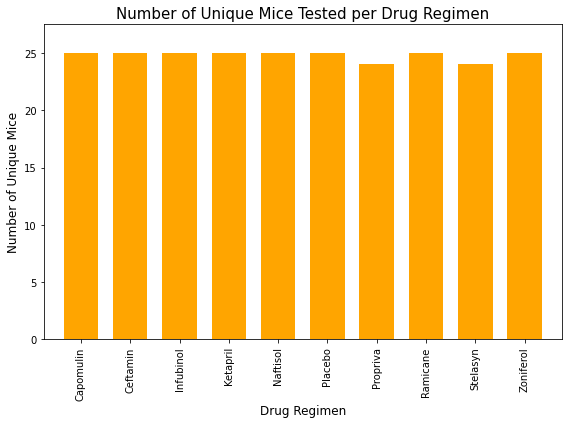

In [44]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
bar_chart = grouped_bar_df.plot(kind='bar', x='Drug Regimen', y='Mouse ID', align='center', color='orange', width=0.7, figsize=(8, 6))

bar_chart.set_title('Number of Unique Mice Tested per Drug Regimen', fontsize=15)
bar_chart.set_ylabel('Number of Unique Mice', fontsize=12)
bar_chart.set_xlabel('Drug Regimen', fontsize=12)

bar_chart.set_ylim(0, max(grouped_bar_df)+2.5)
bar_chart.set_xlim(-0.75, len(grouped_bar_df)-0.25)

plt.tight_layout()
plt.show()

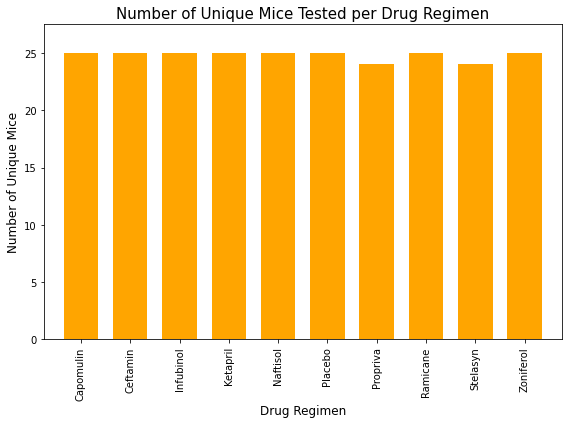

In [45]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_regimen = grouped_bar_df.index
num_unique_mice = grouped_bar_df

x_axis = np.arange(len(num_unique_mice))

plt.figure(figsize=(8, 6))

plt.bar(x_axis, num_unique_mice, color='orange', align='center', width=0.7)
plt.xticks(x_axis, drug_regimen, rotation='vertical')

plt.title('Number of Unique Mice Tested per Drug Regimen', fontsize=15)
plt.ylabel('Number of Unique Mice', fontsize=12)
plt.xlabel('Drug Regimen', fontsize=12)

plt.ylim(0, max(grouped_bar_df)+2.5)
plt.xlim(-0.75, len(x_axis)-0.25)


plt.tight_layout()
plt.show()

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


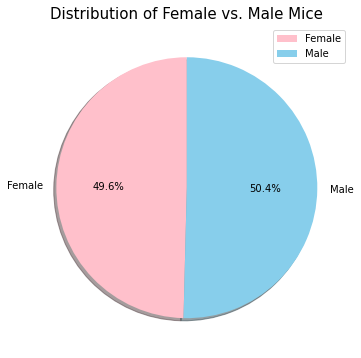

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = clean_df.groupby('Sex')['Mouse ID'].nunique()
print(gender_df)

colors = ['pink', 'skyblue']

pie_chart = gender_df.plot(kind='pie', colors=colors, shadow=True, autopct='%1.1f%%', startangle=90, figsize=(6,6))

pie_chart.set_aspect('equal')

pie_chart.set_title('Distribution of Female vs. Male Mice', fontsize=15)
pie_chart.set_ylabel('')

pie_chart.legend(loc='best')

plt.show()

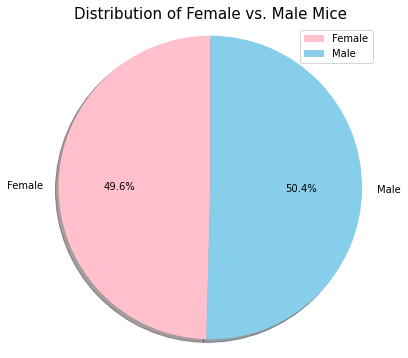

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_df.index

plt.figure(figsize=(6, 6))

plt.pie(gender_df, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', startangle=90)

plt.axis('equal')

plt.title('Distribution of Female vs. Male Mice', fontsize=15)
plt.ylabel('')

plt.legend(loc='best')

plt.show()

## Quartiles, Outliers and Boxplots
Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Find rows of mice treated with four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments_df = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin') | (clean_df['Drug Regimen'] == 'Ramicane')
                                 | (clean_df['Drug Regimen'] == 'Infubinol') | (clean_df['Drug Regimen'] == 'Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse
timepoint_max = four_treatments_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_df = pd.merge(timepoint_max, four_treatments_df, on=['Mouse ID', 'Timepoint'], how='left')
tumor_vol_df = tumor_vol_df.loc[:, ['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

# Check the created DataFrame
print('Below dataFrame shows the final tumor volume of each mouse')
print('treated with Capomulin, Ramicane, Infubinol, and Ceftamin.')
print('---------------------------------------------------------------------------------------------------------------------')
tumor_vol_df

Below dataFrame shows the final tumor volume of each mouse
treated with Capomulin, Ramicane, Infubinol, and Ceftamin.
---------------------------------------------------------------------------------------------------------------------


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [49]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = list(tumor_vol_df['Drug Regimen'].unique())

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == drug]
    
    # add subset 
    tumor_vol.append(final_tumor_vol['Tumor Volume (mm3)'])
    
    # Calculate qualtiles and IQR
    qualtiles = final_tumor_vol['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])

    first_qualtile = qualtiles[0.25]
    third_qualtile = qualtiles[0.75]

    iqr = third_qualtile - first_qualtile

    # Calculate lower bound and upper bound
    lower_bound = first_qualtile - (1.5 * iqr)
    upper_bound = third_qualtile + (1.5 * iqr)
    
        
    # Determine outliers using upper and lower bounds
    outlier_df = final_tumor_vol.loc[(final_tumor_vol['Tumor Volume (mm3)'] > upper_bound) 
                                     | (final_tumor_vol['Tumor Volume (mm3)'] < lower_bound), 'Tumor Volume (mm3)']
    
    # Print potential outliers across four treatment regimens (Infubinol, Ceftamin, Ramicane, and Capomulin)
    print(f'<Potential Outliers For {drug}>')
    print(f'Tumor Volume values above {upper_bound} or below {lower_bound} are potential outliers.')
    print(f'The number of potential outlier is {len(outlier_df)}.')
    print(f'---------------------------------------------------------------------------------------------------')
    print(f'')

<Potential Outliers For Infubinol>
Tumor Volume values above 82.74144559000001 or below 36.83290494999999 are potential outliers.
The number of potential outlier is 1.
---------------------------------------------------------------------------------------------------

<Potential Outliers For Ceftamin>
Tumor Volume values above 87.66645829999999 or below 25.355449580000002 are potential outliers.
The number of potential outlier is 0.
---------------------------------------------------------------------------------------------------

<Potential Outliers For Ramicane>
Tumor Volume values above 54.30681135 or below 17.912664470000003 are potential outliers.
The number of potential outlier is 0.
---------------------------------------------------------------------------------------------------

<Potential Outliers For Capomulin>
Tumor Volume values above 51.83201549 or below 20.70456164999999 are potential outliers.
The number of potential outlier is 0.
-------------------------------------

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin_tumor_vol = tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']
ceftamin_tumor_vol = tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']
ramicane_tumor_vol = tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
infubinol_tumor_vol = tumor_vol_df.loc[tumor_vol_df['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']

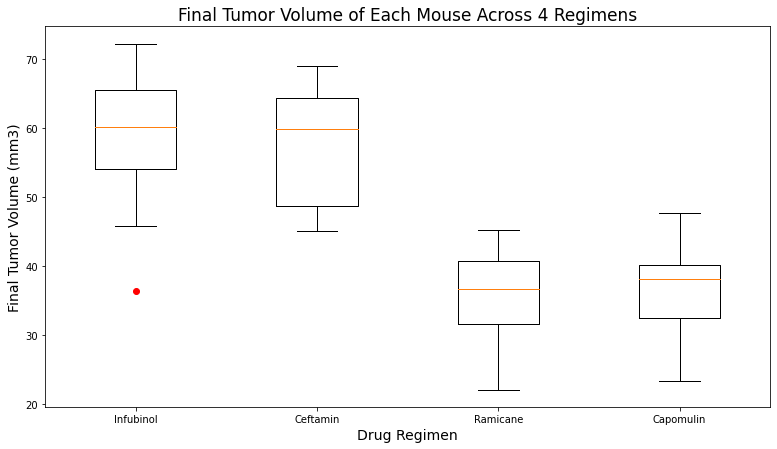

In [51]:
data = [infubinol_tumor_vol, ceftamin_tumor_vol, ramicane_tumor_vol, capomulin_tumor_vol]

plt.figure(figsize=(13,7))

plt.boxplot(data, labels=treatments, sym='red')

plt.title('Final Tumor Volume of Each Mouse Across 4 Regimens', fontsize=17)
plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('Final Tumor Volume (mm3)', fontsize=14)


plt.show()

## Line and Scatter Plots

In [52]:
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


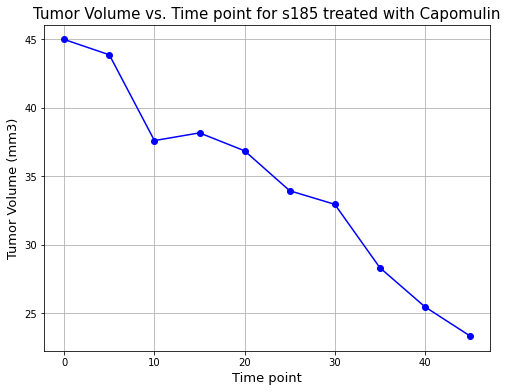

In [53]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
selected_mouse = 's185'
capomulin_selected_mouse = capomulin_df[capomulin_df['Mouse ID'] == selected_mouse]

plt.figure(figsize=(8, 6))
plt.plot(capomulin_selected_mouse['Timepoint'], capomulin_selected_mouse['Tumor Volume (mm3)'], marker='o', color='b')

plt.title(f'Tumor Volume vs. Time point for {selected_mouse} treated with Capomulin', fontsize=15)
plt.xlabel('Time point', fontsize=13)
plt.ylabel('Tumor Volume (mm3)', fontsize=13)

plt.grid()

plt.show()

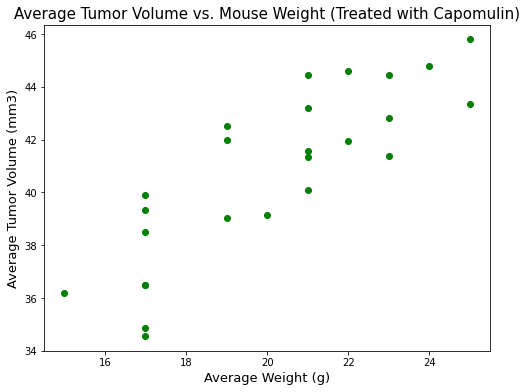

In [54]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_vol_weight = capomulin_df.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

x_axis = avg_vol_weight['Weight (g)']
y_axis = avg_vol_weight['Tumor Volume (mm3)']

plt.figure(figsize=(8, 6))
plt.scatter(x_axis, y_axis, color='green')

plt.title('Average Tumor Volume vs. Mouse Weight (Treated with Capomulin)', fontsize=15)
plt.xlabel('Average Weight (g)', fontsize=13)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=13)

plt.show()

## Correlation and Regression
Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

slope, intercept, r, p, std_err = st.linregress(x_axis, y_axis)

correlation_coefficient = r

print(f"The correlation coeeficient between Average Mouse Weight and Average Tumor Volume is {correlation_coefficient}.")
print('')

# Calculate regression values to create equation of line
regression_values = slope * x_axis + intercept
print('---------------------')
print('Regression Values')
print('---------------------')
print(regression_values)

The correlation coeeficient between Average Mouse Weight and Average Tumor Volume is 0.8419363424694718.

---------------------
Regression Values
---------------------
Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64


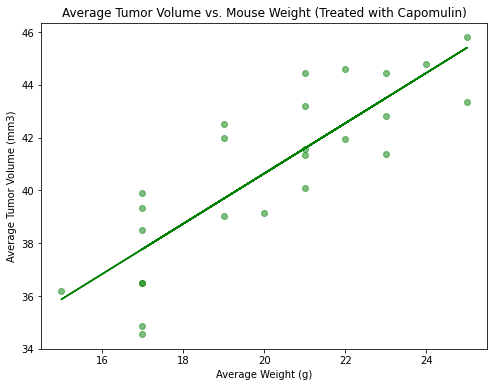

In [56]:
# Generate a scatter plot of Average Weight vs. Average Tumor Volume and plot the linear model on top of scatter plot
plt.figure(figsize=(8, 6))

plt.scatter(x_axis, y_axis, color='green', alpha=0.5)
plt.plot(x_axis, regression_values, color='green')

plt.title('Average Tumor Volume vs. Mouse Weight (Treated with Capomulin)')
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()